# Histograms, Binning, and Density

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [6]:
d = np.random.randn(1000)

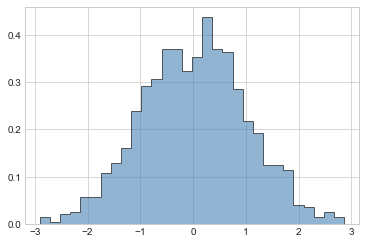

In [71]:
plt.hist(d, bins=30, color='steelblue', density=True, edgecolor='black', 
         histtype = 'stepfilled', alpha=0.6);

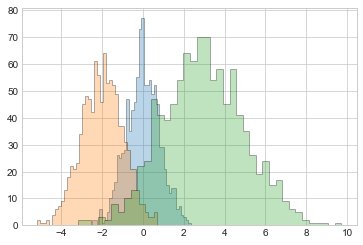

In [70]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40, edgecolor='black')

plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

## 2D histograms and binnings

In [64]:
# Make a 2D histogram by dividing points among two-dimensional bins
mean = [0,0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

Text(0.5,1,'multivariate gaussian distribution')

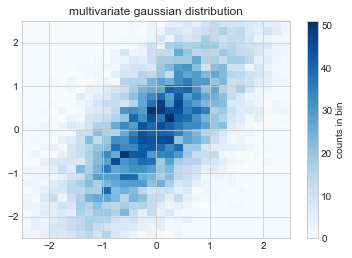

In [81]:
plt.hist2d(x, y, bins=30, range=[[-2.5, 2.5], [-2.5, 2.5]], cmap='Blues');
plt.colorbar().set_label('counts in bin')
plt.title('multivariate gaussian distribution')

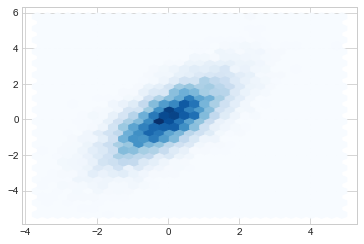

In [92]:
plt.hexbin(x, y, gridsize=30, cmap='Blues');

## Kernel density estimation

In [93]:
from scipy.stats import gaussian_kde

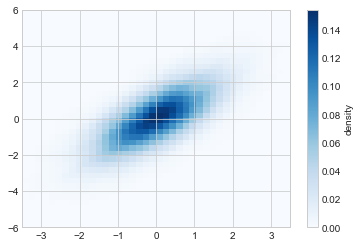

In [111]:
# Fit an array of size [Ndim, Nsamples]
d = np.vstack([x, y])
kde = gaussian_kde(d)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), 
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6], cmap='Blues');

plt.colorbar().set_label('density');